# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Random Forest - Classification</b></p>

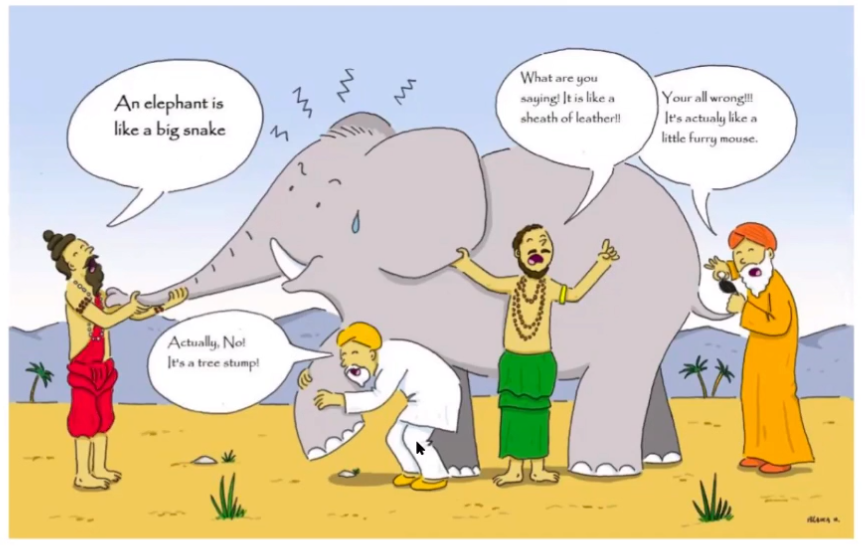

**Random Forest Algorithm and the Blind Men and the Elephant Analogy**

The Random Forest algorithm can be explained using the analogy of blind men attempting to describe an elephant, which serves as a metaphor for ensemble learning.

**Random Forest and Ensemble Learning**
- **Analogy**: Each blind man perceives the elephant differently, but when their perspectives are combined, the true nature of the elephant emerges. This forms the basis of the Random Forest algorithm.
- **Local and Global Optima**: Each decision tree (DT) reaches a local optimum by training on a subset of the dataset. However, combining these local optima with ensemble methods like Random Forest leads to a global optimum, offering a more comprehensive and accurate understanding.
- **Estimators**: Each decision tree independently predicts based on a portion of the dataset. These predictions represent different perspectives, and their combination provides a broader view.
- **Bias and Variance**: Each DT’s interpretation has inherent bias, while combining various interpretations across trees helps reduce variance. Random Forest aims to minimize both bias and variance by aggregating predictions from multiple decision trees.

**Using Random Forest**
- **Definition**: Random Forest is a supervised learning algorithm that combines multiple decision trees.
- **Applications**: Effective in classification and regression tasks, Random Forest reveals hidden structures and relationships in complex datasets.

The strength of Random Forest lies in its ability to combine predictions from multiple decision trees. This approach not only broadens the model’s perspective but also enhances resistance to overfitting.

**Advantages**
- **Robustness**: Combining multiple decision trees increases the model’s generalization capability.
- **Resistant to Overfitting**: Less prone to overfitting compared to a single decision tree.
- **Feature Importance**: Automatically determines the importance of features.
- **Flexibility**: Works with both categorical and numerical data.
- **Parallel Processing**: Training trees in parallel reduces computation time.

**Disadvantages**
- **Interpretability**: Less interpretable than a single decision tree.
- **Computationally Intensive**: Training on large datasets can be time and memory intensive.
- **Optimal Parameter Selection**: Finding the right parameters (e.g., number of trees, depth) can be challenging.

**Key Features**
- **Bagging (Bootstrap Aggregating)**: Each decision tree is trained on a different subset of the data, promoting diversity.
- **Feature Randomness**: Splits during tree training use randomly selected features, increasing robustness.
- **Cross Validation**: No extra cross-validation is needed for model validation since each tree is tested on data not used during training.

Random Forest provides a powerful, flexible, and robust approach to machine learning by leveraging the ensemble of decision trees to balance bias, variance, and overall predictive accuracy.

### **About Dataset**

- The Palmer Archipelago (Antarctica) Penguins dataset contains data on three different species of penguins (Adelie, Chinstrap, and Gentoo) found in Antarctica's Palmer Archipelago.

- This dataset is quite popular for various research and educational uses, particularly for teaching and testing data analysis, statistical models, and machine learning algorithms.

- The dataset includes morphological measurements of the penguins; these measurements include the length and depth of their beaks, flipper (wing) length, and body weight. Additionally, information such as the penguin's species, island, and sex is provided for each observation.

- The Penguins dataset is a popular resource among data science and machine learning communities for both educational and research purposes. Moreover, this dataset is frequently used alongside the seaborn library.

- It is a sufficiently simple dataset to understand how classification results can change by tweaking hyperparameters.

- The data were collected and made available by Dr. Kristen Gorman and her team, members of the Antarctic Long-Term Ecological Research Network (LTER).

- **species**: Indicates the species of the penguin. Unique values: Adelie, Chinstrap, Gentoo.

- **island**: The island where the penguin was observed. Unique values: Biscoe, Dream, Torgersen.

- **culmen_length_mm**: The length of the penguin's culmen (in millimeters).

- **culmen_depth_mm**: The depth of the penguin's culmen (in millimeters).

- **flipper_length_mm**: The length of the penguin's flipper (in millimeters).

- **body_mass_g**: The body weight of the penguin (in grams).

- **sex**: The sex of the penguin.

**The goal is to create a model that can predict a penguin's species based on physical characteristics, thus aiding researchers in classifying penguins in the field without the need for an experienced biologist.**

# Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf  
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
# pip install cufflinks

In [3]:
df0 = pd.read_csv("penguins_size.csv")
df = df0.copy()

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include='number').columns

In [11]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""
    
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [12]:
unique_values(df, cat_features)

Column: species
------------------------------
Unique Values (3): ['Adelie' 'Chinstrap' 'Gentoo']

Value Counts:
species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

Column: island
------------------------------
Unique Values (3): ['Torgersen' 'Biscoe' 'Dream']

Value Counts:
island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

Column: sex
------------------------------
Unique Values (3): ['MALE' 'FEMALE' '.']

Value Counts:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



In [13]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [14]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [15]:
df.loc[336, "sex"] = "MALE"

In [16]:
df.loc[336, "sex"]

'MALE'

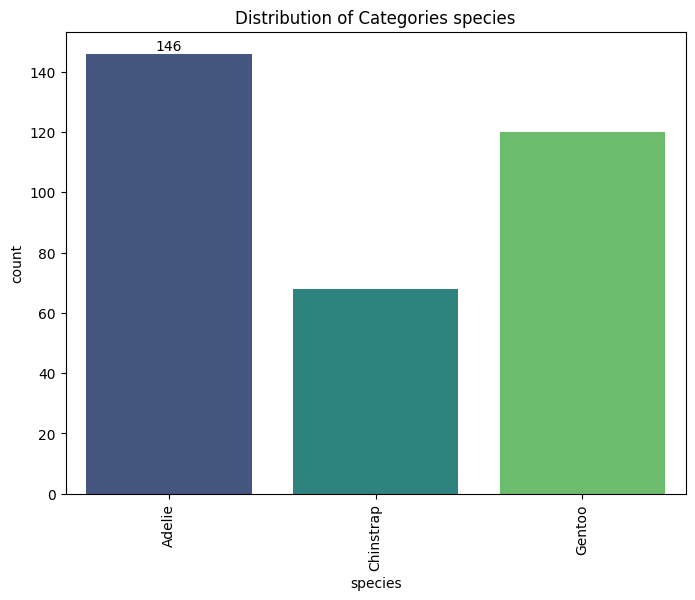

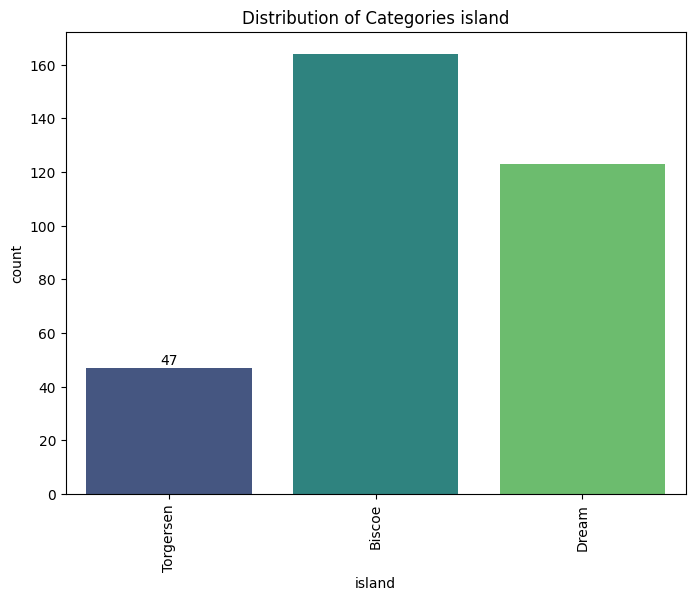

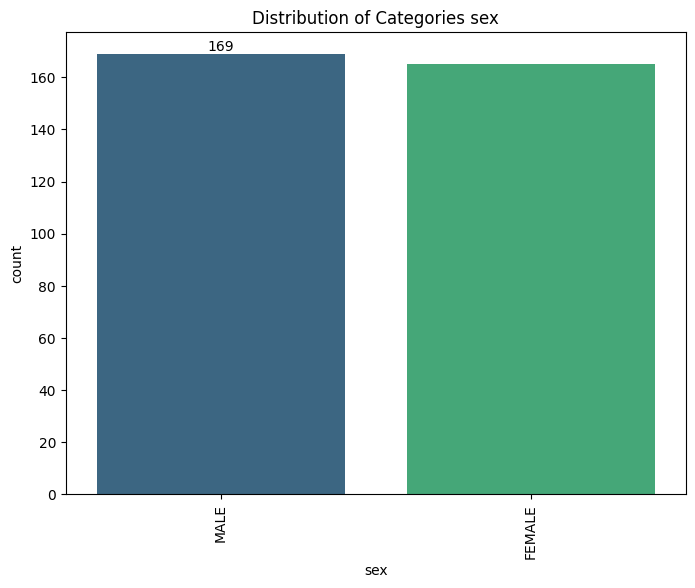

In [ ]:
# To show the distribution of categorical features:

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

   # Automatically label the counts on the bars
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [18]:
species_count = df['species'].value_counts().reset_index()
species_count.columns = ['species', 'count']

fig = px.bar(species_count, x='species', y='count', text='count', color='species')

fig.update_traces(texttemplate='%{text}', textposition='outside')

# ax = sns.countplot(x="species", data=df)
# ax.bar_label(ax.containers[0]);

In [19]:
species_sex_count = df.groupby(['species', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='species', y='count', color='species', facet_col='sex', text='count')

fig.update_traces(texttemplate='%{text}', textposition='outside')

# g = sns.catplot(x="species", data=df, kind="count", col="sex")
# g.facet_axis(0, 0).bar_label(container=g.facet_axis(0, 0).containers[0])
# g.facet_axis(0, 1).bar_label(container=g.facet_axis(0, 1).containers[0])

In [20]:
species_sex_count = df.groupby(['species', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='species', y='count', color='sex', text='count', barmode='group')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Species',
    yaxis_title='Count',
    title='Count of Penguins by Species and Sex'
)

fig.show()

In [21]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();


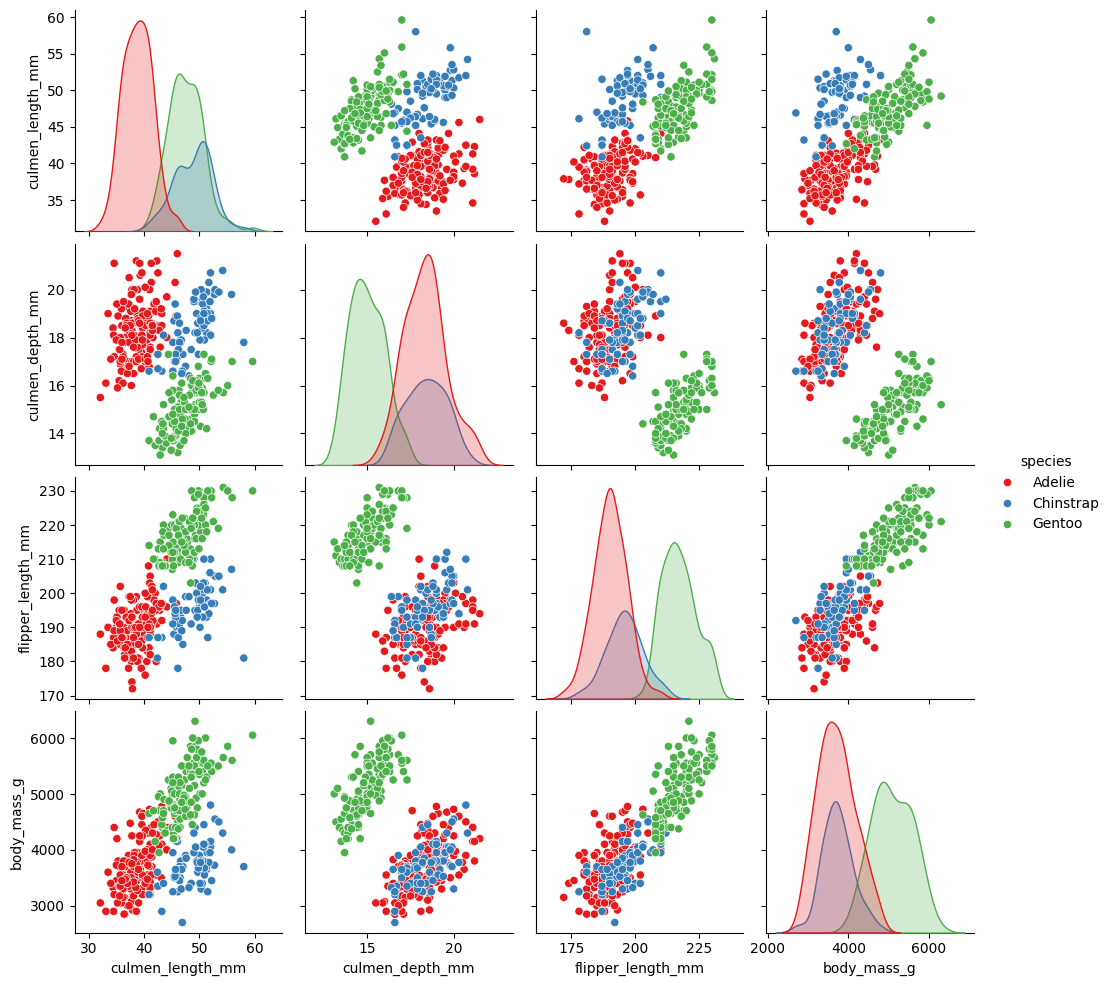

In [22]:
sns.pairplot(df, hue="species", palette="Set1");

In [23]:
import plotly.express as px

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

In [24]:
# plt.figure(figsize=(8,6))
# sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
# plt.title("Correlation Matrix")

# plt.show()

In [25]:
cf.go_offline()
df.iloc[:,1:].iplot(kind="box")

In [26]:
df_long = df.melt(id_vars=['species'],
                  value_vars=num_features,
                  var_name='measurement')

color_discrete_map = {
    "Adelie": 'red',
    "Chinstrap": 'green',
    "Gentoo": 'blue'
}

fig = px.box(df_long,
             x='measurement',
             y='value',
             color='species',
             color_discrete_map=color_discrete_map)

fig.show()

**melt fonksiyonu**, DataFrame'leri "uzun" formata dönüştürmek için kullanılan bir fonksiyondur. 


| species | length | width | height |
|---------|--------|-------|--------|
| Adelie  | 10     | 5     | 20     |
| Chinstrap | 12   | 6     | 22     |

```python
df.melt(id_vars=['species'], value_vars=['length', 'width', 'height'], var_name='measurement')
```

| species   | measurement | value |
|-----------|-------------|-------|
| Adelie    | length      | 10    |
| Adelie    | width       | 5     |
| Adelie    | height      | 20    |
| Chinstrap | length      | 12    |
| Chinstrap | width       | 6     |
| Chinstrap | height      | 22    |


# Modelling

**Random Forest: Ensemble Model Using Multiple Decision Trees**

### **Core Concepts**

- **Ensemble Learning**: Random Forest combines multiple learners (decision trees) to create a strong model. This approach balances the errors of individual learners and improves overall performance.

- **Decision Trees**: The building blocks of Random Forest are decision trees. Each tree is trained independently on randomly selected subsets of the data.

- **Bagging (Bootstrap Aggregating)**: During training, Random Forest employs the bagging technique. Each decision tree is trained on a subset of the original dataset created through bootstrap sampling (random selection with replacement).

---

### **Performance and Features**

- **High Accuracy**: By averaging the predictions of individual trees or taking the majority vote, Random Forest often achieves high levels of accuracy.

- **Reduced Risk of Overfitting**: Unlike a single decision tree, Random Forest reduces the risk of overfitting, as the overfitting tendencies of individual trees are balanced out.

- **Feature Importance Determination**: Random Forest can identify the importance of features, helping to understand which features are most influential in predictions.

---

### **Applications and Usage**

- **Wide Application Areas**: Random Forest is effectively used in fields such as financial modeling, bioinformatics, ecology, and more.

- **Ability to Handle Large Datasets**: It works well with large and high-dimensional datasets, managing model complexity and offering scalability.

- **High Computational Requirements**: Building multiple decision trees requires significant computation, so powerful computers are often necessary for large datasets.

|  | Decision Tree | Random Forest |
|-------------------|---------------|---------------|
| **Definition** | A model that makes decisions based on a series of binary choices, resembling a tree structure. | A collection of decision trees whose results are aggregated to make a final decision. |
| **Overfitting** | Prone to overfitting, especially with complex or noisy data. | Less prone to overfitting as it combines the results of multiple trees. |
| **Accuracy** | Can be less accurate with datasets having high variance or complexity. | Typically more accurate due to the aggregation reducing errors from individual trees. |
| **Complexity** | Simple structure, easy to understand and visualize. | More complex due to multiple trees, which makes it harder to visualize and interpret. |
| **Interpretability** | High interpretability as each decision path can be traced. | Lower interpretability because of the ensemble nature, although individual trees can be examined. |
| **Computation** | Fast to train on smaller datasets, but can struggle with large data. | Requires more computational power and time to train because of many trees. |
| **Use Case** | Works well when a simple model suffices and when explainability is important. | Better suited for problems where accuracy is critical and the model can handle more complexity. |

|  | Bagging | Boosting |
|-------------------|---------|----------|
| **Definition** | An ensemble method that combines the results of multiple models (e.g., trees) built with resampled training data to improve stability and accuracy. | An ensemble method that builds a sequence of models in a way that each subsequent model aims to correct the errors of the previous ones. |
| **Overfitting** | Reduces the risk of overfitting by averaging out predictions. | Can be prone to overfitting if not carefully tuned, especially on noisy datasets. |
| **Accuracy** | Generally provides improved accuracy by reducing variance. | Often provides higher accuracy by combining weak learners into a strong learner. |
| **Complexity** | Parallelizable since each model is built independently. | Sequential and additive, as each model depends on the previous one, increasing complexity. |
| **Interpretability** | Individual models are interpretable, but the ensemble as a whole may not be. | The sequential nature can make the ensemble less interpretable, although the contribution of each model is clearer. |
| **Computation** | Computationally intensive due to the need to train multiple models, but can be parallelized. | Computationally intensive as models are built in sequence and each model's errors are reweighted. |
| **Use Case** | Effective in reducing variance in models that have high variance. | Effective in reducing bias in models that have high bias, and in problems where the focus is on boosting performance of weak learners. |

## Train | Test Split

In [27]:
X = df.drop('species',axis=1)
y = df['species']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [29]:
cat = X_train.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 
column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough')

**make_column_transformer Function**

- A tool from the **scikit-learn** library commonly used during the data preprocessing phase.

- This function allows you to apply different transformations to different columns in your dataset. As a result, you can easily perform preprocessing steps tailored to various types of data (e.g., numerical and categorical data).

- You can create a column transformer and apply it to specific columns in your dataset.

**Parameters**

**transformerX**:
- The transformation to be applied. For example, **`OneHotEncoder`**, **`StandardScaler`**, or other transformation classes from scikit-learn.

**columnsX**:
- The columns to which the transformation will be applied. Specified as a list of column names or indices.
**remainder Parameter**
Defines the action to be taken for columns not explicitly mentioned in the transformer. It can take two main values:

- **`drop`**:
  - Drops columns not specified in the transformer from the output.
  - Useful when you only want to transform specific columns and ignore the rest.

- **`passthrough`**:
  - Leaves columns not specified in the transformer unchanged in the output.
  - Useful when you want to apply transformations to some columns while keeping the others as they are.

**handle_unknown Parameter**
- Used in transformations like **`OneHotEncoder`** or **`OrdinalEncoder`** to define how to handle unseen categorical values. It can take two main values:
- **`error`**:
  - Raises an error if an unseen value is encountered during transformation.
  - Ensures unexpected values are identified early.
- **`ignore`**:
  - Ignores unseen values and continues the transformation.
  - Makes the model more robust to unexpected values.
**Benefits**
Using `make_column_transformer` simplifies and organizes the data preprocessing pipeline. It allows you to:
1. Apply specific transformations to different types of data.
2. Manage transformations for large datasets with diverse feature types.
3. Prepare your dataset efficiently for machine learning models.

This function is a valuable tool for creating flexible and manageable preprocessing workflows tailored to your dataset's needs.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(random_state=101))])

**If we didn't use a Pipeline, we would build the model as follows:**

from sklearn.tree import DecisionTreeClassifier

RF_model = RandomForestClassifier(random_state=101)

RF_model.fit(X_train,y_train)

## Model Performance

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [33]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [34]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

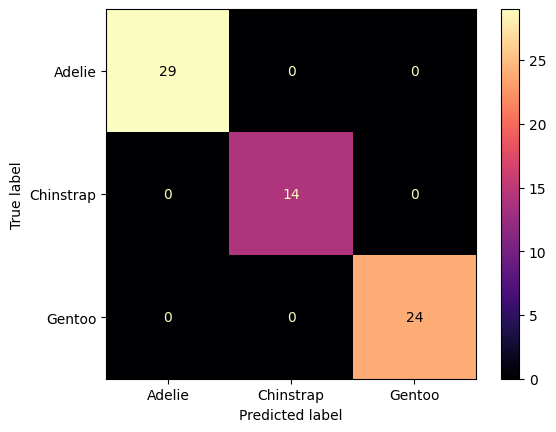

In [35]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, cmap="magma");

In [36]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [37]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.985185
train_accuracy           1.000000
test_precision_micro     0.985185
train_precision_micro    1.000000
test_recall_micro        0.985185
train_recall_micro       1.000000
test_f1_micro            0.985185
train_f1_micro           1.000000
dtype: float64

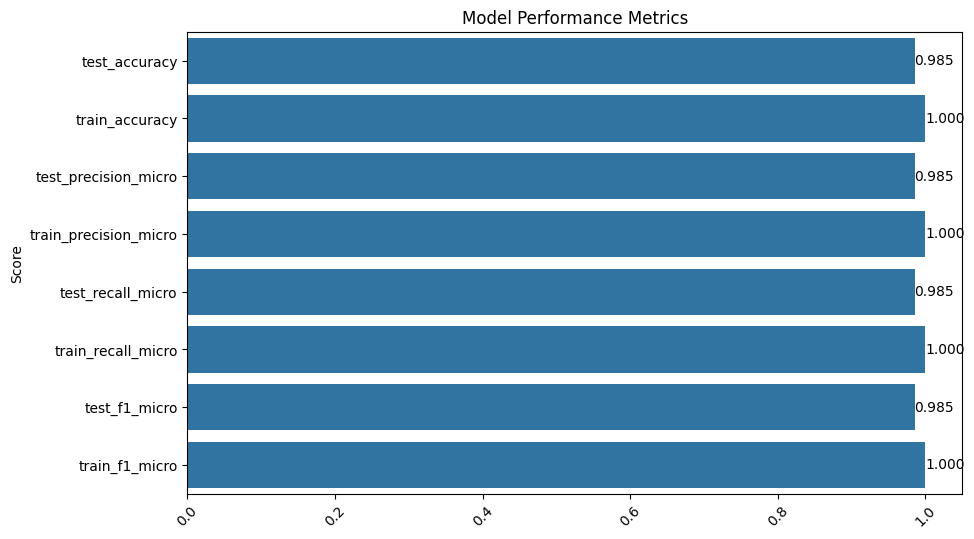

In [38]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f') 
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

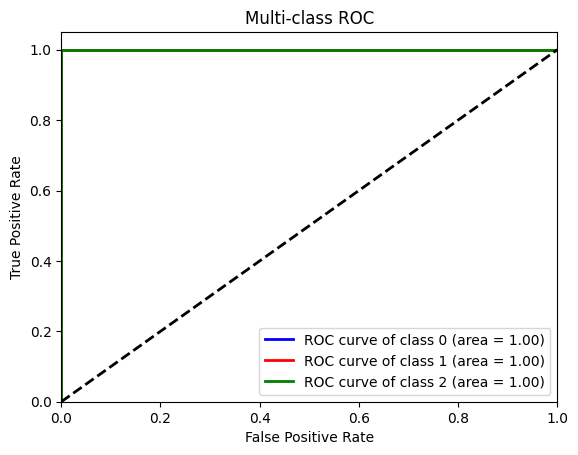

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

model.fit(X_train, y_train)

# Convert the target variable into binary format
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Retrieve the prediction probabilities
y_pred_proba = model.predict_proba(X_test)

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

## Overfitting Risk and Features Importance in Random Forest

Random Forest and Decision Tree models provide different approaches to determining Feature Importance.

Both models measure the impact of features on the target variable, but Random Forest follows a more comprehensive method for this calculation.

**Decision Tree Feature Importance**

- **Single Model**: Decision Tree operates on a single model, making it sensitive to noise or overfitting effects in the dataset.
- **Tree Depth**: The deeper the tree, the more complex the model becomes, which can lead to either overestimating or underestimating the importance of features.
- **Locally Optimal Features**: At each split, the best feature is selected, potentially ignoring other influential features.

**Random Forest Feature Importance**

- **Multiple Models**: Random Forest combines results from multiple decision trees, each trained on randomly sampled subsets of the dataset.
- **Overfitting Reduction**: Independent training of trees and random feature selection reduce overfitting risk and improve overall model stability.
- **Global Feature Importance**: Feature Importance scores are averaged across all trees, reducing the bias of individual trees and providing more reliable measurements.
- **Feature Interactions**: Random Forest considers interactions and dependencies between features, offering a more comprehensive evaluation of feature importance.


In [ ]:
pipe_model["RF_model"].feature_importances_ 
# rf_model.feature_importances_

array([0.10360177, 0.00685424, 0.34896369, 0.17506071, 0.25094389,
       0.11457569])

In [41]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

In [42]:
X_train.sample()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
38,Dream,37.6,19.3,181.0,3300.0,FEMALE


In [43]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [44]:
df_fi = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_, index = new_features, #index=X.columns
                              columns = ["Feature Importance"])

df_fi = df_fi.sort_values("Feature Importance", ascending = False)
df_fi

,Feature Importance
culmen_length_mm,0.348964
flipper_length_mm,0.250944
culmen_depth_mm,0.175061
body_mass_g,0.114576
island,0.103602
sex,0.006854


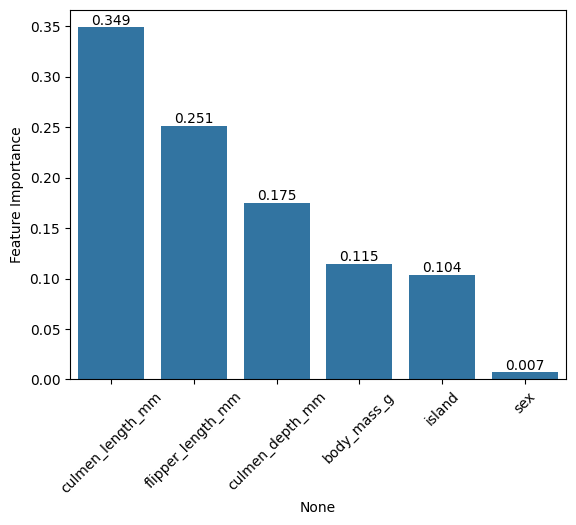

In [45]:
ax =sns.barplot(x = df_fi.index, y = 'Feature Importance', data = df_fi)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 45)
plt.show();

## Understanding and Evaluating Hyperparameters in Random Forest

**Differences Between RandomForestClassifier and DecisionTreeClassifier**

1. **`criterion` Parameter**:  
   - In Random Forest, the `criterion` parameter includes an additional option: **`log_loss`**, commonly used in logistic regression. 
   - The default value remains **`gini`**.

2. **`max_features` Parameter**:  
   - The default value of `max_features` in Random Forest is **`"sqrt"`**, meaning the square root of the total number of features is used for each split. This value is rounded to the nearest integer.
   - In Decision Tree, this parameter defaults to **`None`**, using all features.

3. **`splitter` Parameter**:  
   - Random Forest does not include a `splitter` parameter. Each decision tree in the forest selects the best feature for each split (not randomly).

4. **`bootstrap` Parameter**:  
   - Random Forest has a `bootstrap` parameter (default: **`True`**), which allows each tree to be trained on approximately 66% (2/3) of the dataset sampled with replacement. This increases model diversity.

5. **`oob_score` Parameter**:  
   - Out-of-Bag (OOB) scores evaluate each tree using the 33% of the data not included in the bootstrap sample.  
   - Setting `oob_score=True` enables the assessment of model performance and feature importance without needing a separate validation set.

6. **`class_weight` Parameter**:  
   - Random Forest supports both **`"balanced"`** and **`"balanced_subsample"`** options:  
     - **`"balanced"`**: Weights classes based on the entire dataset's class frequencies.  
     - **`"balanced_subsample"`**: Weights classes based on the class frequencies in each tree's training subset.  
   - Decision Tree lacks the **`"balanced_subsample"`** option.

7. **`max_samples` Parameter**:  
   - In Random Forest, the `max_samples` parameter controls the proportion of the dataset used to train each tree (e.g., **`0.5`** or **`0.8`**).  
   - This parameter is useful for reducing computational cost and memory usage when working with large datasets.

In [46]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
 |  The sub-sample size is controlled with the `max_samples` paramet

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

model = RandomForestClassifier(oob_score=True, bootstrap=True, n_estimators=100, random_state=42)
model.fit(X, y)

model.oob_score_

In [ ]:
from sklearn.tree import plot_tree 

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], feature_names=new_features, #features_names=X.columns
          class_names=df.species.unique().tolist(),
          filled = True,
          fontsize = 8);



In [48]:
RF_model = RandomForestClassifier(random_state=101, max_samples=0.5)
operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations) # pruned_tree = RandomForestClassifier(max_samples=0.5)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(max_samples=0.5, random_state=101))])



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



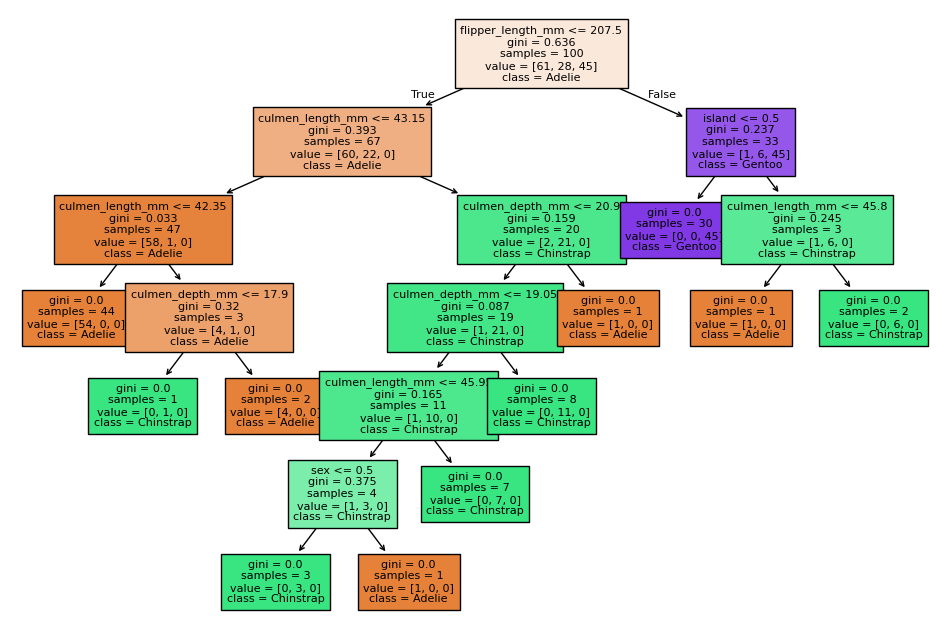

In [ ]:
report_model(pruned_tree, 25)

# 133*2/3 = 89

# Approximately 2/3 of the 267 observations in the training dataset are used in each tree when `max_samples=0.5`.
# As seen in this tree, a similar proportion of observations has been utilized.

## Final Model & Prediction

In [50]:
X = df.drop(columns=["species"])
y = df['species']

In [51]:
operations = [("transformer", column_trans), ("RF", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF', RandomForestClassifier(random_state=101))])

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [53]:
observations = {"island": ["Torgersen", "Dream"], "culmen_length_mm":[35, 40], "culmen_depth_mm":[15, 20],
               "flipper_length_mm":[175, 210], "body_mass_g":[3000, 4600], "sex":["FEMALE", "MALE"]}

In [54]:
obs = pd.DataFrame(observations)
obs

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,35,15,175,3000,FEMALE
1,Dream,40,20,210,4600,MALE


In [55]:
pred = pipe_model.predict(obs)
pred

array(['Adelie', 'Adelie'], dtype=object)

## Inverse transform

**inverse_transform**

- Used to reverse the transformation of encoded data back to its original form before encoding.

In [56]:
enc = OrdinalEncoder()

In [57]:
obs[cat]

,island,sex
0,Torgersen,FEMALE
1,Dream,MALE


In [58]:
obs[cat] = enc.fit_transform(obs[cat])

In [59]:
obs[cat].head()

,island,sex
0,1.0,0.0
1,0.0,1.0


In [60]:
obs[cat] = enc.inverse_transform(obs[cat])

In [61]:
obs[cat] 

,island,sex
0,Torgersen,FEMALE
1,Dream,MALE


In [62]:
pred = pd.Series(pred).rename("prediction")

In [63]:
pd.concat([obs, pred], axis = 1)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,prediction
0,Torgersen,35,15,175,3000,FEMALE,Adelie
1,Dream,40,20,210,4600,MALE,Adelie


## DT and RF for Diabetes Dataset

We will analyze both **Decision Tree** and **Random Forest** models on an unbalanced dataset, **ditabes.csv**.

We will compare the performance of these models with the scores previously obtained from the **Logistic Regression** and **SVM** models.

In [64]:
df = pd.read_csv("diabetes.csv") 

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
df=df[df.SkinThickness<70]
df=df[df.Glucose>0]
df=df[df.BloodPressure>35]
df=df[df.BMI>0]

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               720 non-null    int64  
 1   Glucose                   720 non-null    int64  
 2   BloodPressure             720 non-null    int64  
 3   SkinThickness             720 non-null    int64  
 4   Insulin                   720 non-null    int64  
 5   BMI                       720 non-null    float64
 6   DiabetesPedigreeFunction  720 non-null    float64
 7   Age                       720 non-null    int64  
 8   Outcome                   720 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.2 KB


In [68]:
df.Outcome.value_counts()

Outcome
0    473
1    247
Name: count, dtype: int64

## Train | Test Split and Scalling

In [69]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modelling and Model Performance

### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[78 19]
 [19 28]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.60      0.60      0.60        47

    accuracy                           0.74       144
   macro avg       0.70      0.70      0.70       144
weighted avg       0.74      0.74      0.74       144


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [ ]:
from sklearn.model_selection import StratifiedKFold

model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)


cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.748094
train_accuracy     1.000000
test_precision     0.638427
train_precision    1.000000
test_recall        0.625000
train_recall       1.000000
test_f1            0.627901
train_f1           1.000000
dtype: float64

In [74]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 2, 3, 4],
              "min_samples_leaf": [2, 3],
              "min_samples_split": [2, 3, 4]}

In [75]:
model = DecisionTreeClassifier(class_weight="balanced", random_state=101)

cv = StratifiedKFold(n_splits=10)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            cv = cv,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [76]:
dt_grid_model.best_params_

{'max_depth': 2,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [77]:
dt_grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       random_state=101, splitter='random')

In [78]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[24 73]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.86      0.25      0.38        97
           1       0.37      0.91      0.53        47

    accuracy                           0.47       144
   macro avg       0.61      0.58      0.46       144
weighted avg       0.70      0.47      0.43       144


Train_Set
[[142 234]
 [  9 191]]
              precision    recall  f1-score   support

           0       0.94      0.38      0.54       376
           1       0.45      0.95      0.61       200

    accuracy                           0.58       576
   macro avg       0.69      0.67      0.58       576
weighted avg       0.77      0.58      0.56       576



In [79]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       random_state=101, splitter='random')

cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.583243
train_accuracy     0.579283
test_precision     0.452976
train_precision    0.450100
test_recall        0.955000
train_recall       0.953889
test_f1            0.614221
train_f1           0.611588
dtype: float64

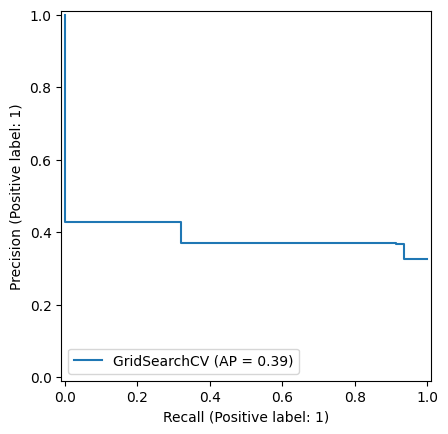

In [80]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(dt_grid_model, X_test, y_test)

### Random Forest

In [81]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [82]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[78 19]
 [20 27]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.59      0.57      0.58        47

    accuracy                           0.73       144
   macro avg       0.69      0.69      0.69       144
weighted avg       0.73      0.73      0.73       144


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [83]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = cv,
                       return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.770599
train_accuracy     0.999807
test_precision     0.695034
train_precision    1.000000
test_recall        0.605000
train_recall       0.999444
test_f1            0.644763
train_f1           0.999721
dtype: float64

In [84]:
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[2, 3, 4],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [2,3,4],
             'max_samples':[0.8, 1]}

In [ ]:
model = RandomForestClassifier(class_weight={0:1, 1:4},random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose=2).fit(X_train, y_train)

# Since `class_weight="balanced"` was insufficient, a 1:4 weighting ratio was applied.

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


In [86]:
rf_grid_model.best_params_

{'max_depth': 2,
 'max_features': 2,
 'max_samples': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 128}

In [87]:
rf_grid_model.best_score_

0.9700000000000001

In [88]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[35 62]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.92      0.36      0.52        97
           1       0.42      0.94      0.58        47

    accuracy                           0.55       144
   macro avg       0.67      0.65      0.55       144
weighted avg       0.76      0.55      0.54       144


Train_Set
[[165 211]
 [  5 195]]
              precision    recall  f1-score   support

           0       0.97      0.44      0.60       376
           1       0.48      0.97      0.64       200

    accuracy                           0.62       576
   macro avg       0.73      0.71      0.62       576
weighted avg       0.80      0.62      0.62       576



In [89]:
model = RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=2, max_features=2,
                       max_samples=0.8, min_samples_leaf=2, n_estimators=128,
                       random_state=101)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.614519
train_accuracy     0.635989
test_precision     0.473992
train_precision    0.488134
test_recall        0.960000
train_recall       0.978889
test_f1            0.634247
train_f1           0.651366
dtype: float64

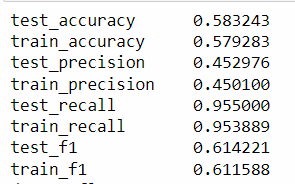

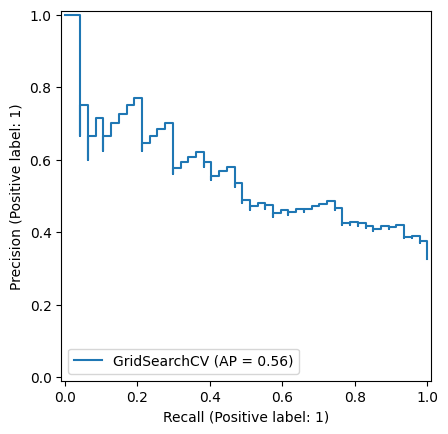

In [90]:
PrecisionRecallDisplay.from_estimator(rf_grid_model, X_test, y_test);